## A

In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from time import time
from sklearn.linear_model import Lasso


In [170]:
df = pd.read_csv('data/Data.csv')
df

,X,Y
0,-0.994787,6.808710
1,-0.950996,6.460205
2,-0.919999,7.354000
3,-0.876221,7.420564
4,-0.838166,7.595328
5,-0.798846,7.668996
6,-0.757672,7.698224
7,-0.715680,8.482516
8,-0.675040,8.225892
9,-0.633265,8.368351


In [171]:
X = df['X']
Y = df['Y']

In [172]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=10, shuffle=True)

# B

In [173]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=0.8, random_state=10, shuffle=True)

In [174]:
X_train = np.array(X_train).reshape((-1,1))
Y_train = np.array(Y_train).reshape((-1,1))
X_test = np.array(X_test).reshape((-1,1))
Y_test = np.array(Y_test).reshape((-1,1))
X_val = np.array(X_val).reshape((-1,1))
Y_val = np.array(Y_val).reshape((-1,1))
X = np.array(X).reshape((-1,1))
Y = np.array(Y).reshape((-1,1))


In [175]:
def MSE(y_pred, y_true):
    return np.mean((y_true-y_pred)**2)

In [176]:
def batch_gradient_descent_linear_reggression(data, target, learning_rate, epochs):
    
    n_sample = data.shape[0]
    weights = np.zeros(shape=(data.shape[-1],1))
    bias = 0
    hist = []

    for epoch in tqdm(range(epochs), desc="Training Process"):
        prediction = np.dot(data, weights) + bias
        loss = MSE(prediction, target)
        weights -= learning_rate * (np.sum((prediction - target) * data, axis=0)/n_sample).reshape((-1,1))
        bias -= learning_rate * (np.sum((prediction - target), axis=0)/n_sample)
        hist.append(loss)
    return weights, bias, hist

In [177]:
def grid_search_on_lr(model, train_data, train_target, validation_data, validation_target, learning_rate_list, epochs):
    hist = []
    for index in range(len(learning_rate_list)):
        lr = learning_rate_list[index]
        weights,bias,_ = model(train_data, train_target, lr, epochs)
        prediction = np.dot(validation_data, weights)+bias
        loss = MSE(prediction, validation_target)
        hist.append([loss, weights, bias])
    min_idx = hist.index(min(hist))
    return min_idx, hist

In [178]:
learning_rate_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]
epochs = 200
min_idx, hist = grid_search_on_lr(batch_gradient_descent_linear_reggression, X_train, Y_train, X_val, Y_val, learning_rate_list, epochs)

Training Process:   0%|          | 0/200 [00:00<?, ?it/s]c:\Users\mykar\Anaconda3\envs\anaconda-env\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\mykar\AppData\Local\Temp\ipykernel_10320\2678786597.py:2: RuntimeWarning: overflow encountered in square
  return np.mean((y_true-y_pred)**2)
Training Process: 100%|██████████| 200/200 [00:00<00:00, 44332.57it/s]


In [179]:
print(min_idx, hist)

3 [[71.88108072367703, array([[-0.01986819]]), array([0.16750881])], [51.4060328006476, array([[-0.17842989]]), array([1.53243409])], [3.5999973261667906, array([[-0.68265591]]), array([7.27372541])], [1.9560291598608877, array([[-0.36976415]]), array([8.42123998])], [1.9574659596007595, array([[-0.36828046]]), array([8.42146732])], [inf, array([[3.0868056e+192]]), array([-2.01463031e+193])]]


In [180]:
best_weights = int(hist[min_idx][1])
best_bias = int(hist[min_idx][2])

C:\Users\mykar\AppData\Local\Temp\ipykernel_10320\1017434265.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  best_weights = int(hist[min_idx][1])
C:\Users\mykar\AppData\Local\Temp\ipykernel_10320\1017434265.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  best_bias = int(hist[min_idx][2])


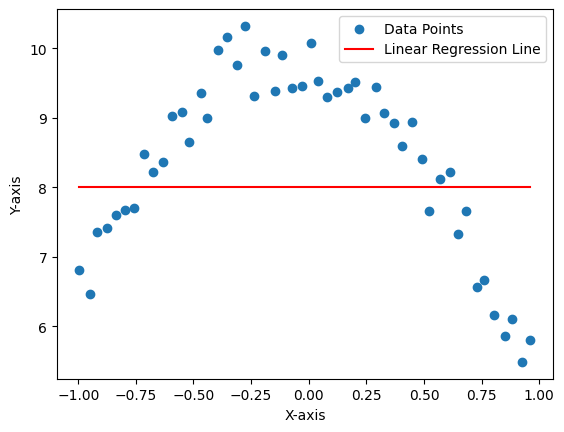

In [181]:
prediction = np.dot(X, best_weights)+best_bias
plt.scatter(X, Y, label='Data Points')
plt.plot(X, prediction, color='red', label='Linear Regression Line')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [183]:
prediction_train = np.dot(X_train, best_weights)+best_bias
prediction_test = np.dot(X_test, best_weights)+best_bias
MSE_train = MSE(prediction_train, Y_train)
MSE_test = MSE(prediction_test, Y_test)
print(MSE_train, MSE_test)

1.7482394466773026 1.4493659792458267


As you can see in the above cell, the test error is lower than the train error. This is because our data size is small, and the test set, as the professor said in the class, may contain some easier data to predict, so our error in the test set is lower than the error in the train set.

## C

In [184]:
def closed_form_linear_regression(data, target):
    return np.dot(np.dot(np.linalg.inv(np.dot(data.T, data)), data.T),target)

In [185]:
X_train_transformed = np.ones(shape=(X_train.shape[0], X_train.shape[1]+1))
X_train_transformed[:,1] = X_train.reshape((-1))
X_transformed = np.ones(shape=(X.shape[0], X.shape[1]+1))
X_transformed[:,1] = X.reshape((-1))
X_test_transformed = np.ones(shape=(X_test.shape[0], X_test.shape[1]+1))
X_test_transformed[:,1] = X_test.reshape((-1))

In [186]:
optimal_weights = closed_form_linear_regression(X_train_transformed, Y_train)

In [187]:
optimal_weights

array([[ 8.42146732],
       [-0.36828046]])

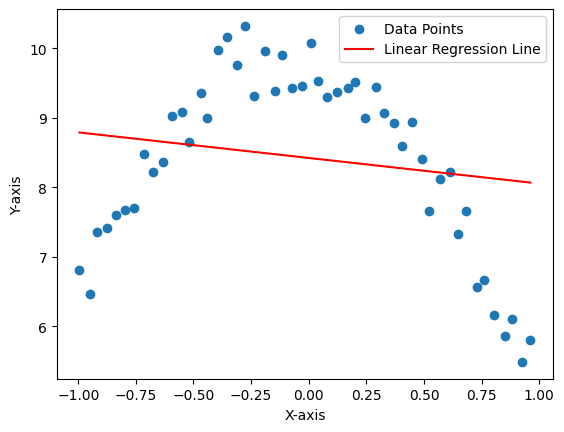

In [188]:
prediction = np.dot(X_transformed, optimal_weights)
plt.scatter(X, Y, label='Data Points')
plt.plot(X, prediction, color='red', label='Linear Regression Line')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [189]:
prediction_train = np.dot(X_train_transformed, optimal_weights)
prediction_test = np.dot(X_test_transformed, optimal_weights)
MSE_train = MSE(prediction_train, Y_train)
MSE_test = MSE(prediction_test, Y_test)
print(MSE_train, MSE_test)

1.49308724393379 1.3707503189232095


In [191]:
start = time()
BG_weights, BG_bias, _ = batch_gradient_descent_linear_reggression(X_train, Y_train, learning_rate = 0.1, epochs=100)
end = time()
BG_time = end - start

start2 = time()
CF_weights = closed_form_linear_regression(X_train_transformed, Y_train)
end2 = time()
CF_time = end2 - start2

Y_predicted_train_BG = np.dot(X_train, BG_weights)+BG_bias
Y_predicted_test_BG = np.dot(X_test, BG_weights)+BG_bias
Y_predicted_train_CF = np.dot(X_train_transformed, CF_weights)
Y_predicted_test_CF = np.dot(X_test_transformed, CF_weights)
print(f'BG takes {BG_time} while CF takes {CF_time}.')
print(f'BG_MSE on train is {MSE(Y_predicted_train_BG, Y_train)} while in test is {MSE(Y_predicted_test_BG, Y_test)}.')
print(f'CF_MSE on train is {MSE(Y_predicted_train_CF, Y_train)} while in test is {MSE(Y_predicted_test_CF, Y_test)}.')

Training Process: 100%|██████████| 100/100 [00:00<00:00, 31714.96it/s]

BG takes 0.00499415397644043 while CF takes 0.0.
BG_MSE on train is 1.4935187092949294 while in test is 1.3594023420867125.
CF_MSE on train is 1.49308724393379 while in test is 1.3707503189232095.


In this example, because our data size is small, the closed-form solution executes too fast and provides the solution faster than BG, while in large datasets, BG performs much faster than the closed-form solution because computing the inverse in that example is so time-consuming. Also, closed form has the least error in the train set, and BG also performs well, very close to closed form, but in the test set, BG performs a little bit better than closed form, I think, because closed form is stuck to the train set and our train and test sets are small, so sticking to the train set makes a little bit of distance from test set data. Also, both of them are suffering from underfitting problems and need more complex structures to perform better.

## D

In [192]:
def create_power_dataset(data, power):
    output = np.ones(shape=(data.shape[0], power+1))
    for index in range(power+1):
        output[:,index] = np.power(data.reshape((-1)),index)
    return output

With power of 5 CF_MSE on train is 0.08411493566645055 while CF_MSE on test is 0.09287339489623918.
With power of 7 CF_MSE on train is 0.08096659785998422 while CF_MSE on test is 0.10557531235820024.
With power of 9 CF_MSE on train is 0.08065326717704518 while CF_MSE on test is 0.10348495670588675.
With power of 11 CF_MSE on train is 0.07708831648989661 while CF_MSE on test is 0.10410287522976272.
With power of 13 CF_MSE on train is 0.0767243476454825 while CF_MSE on test is 0.10665450840440949.
With power of 15 CF_MSE on train is 0.05799230507577298 while CF_MSE on test is 0.3425447229551698.


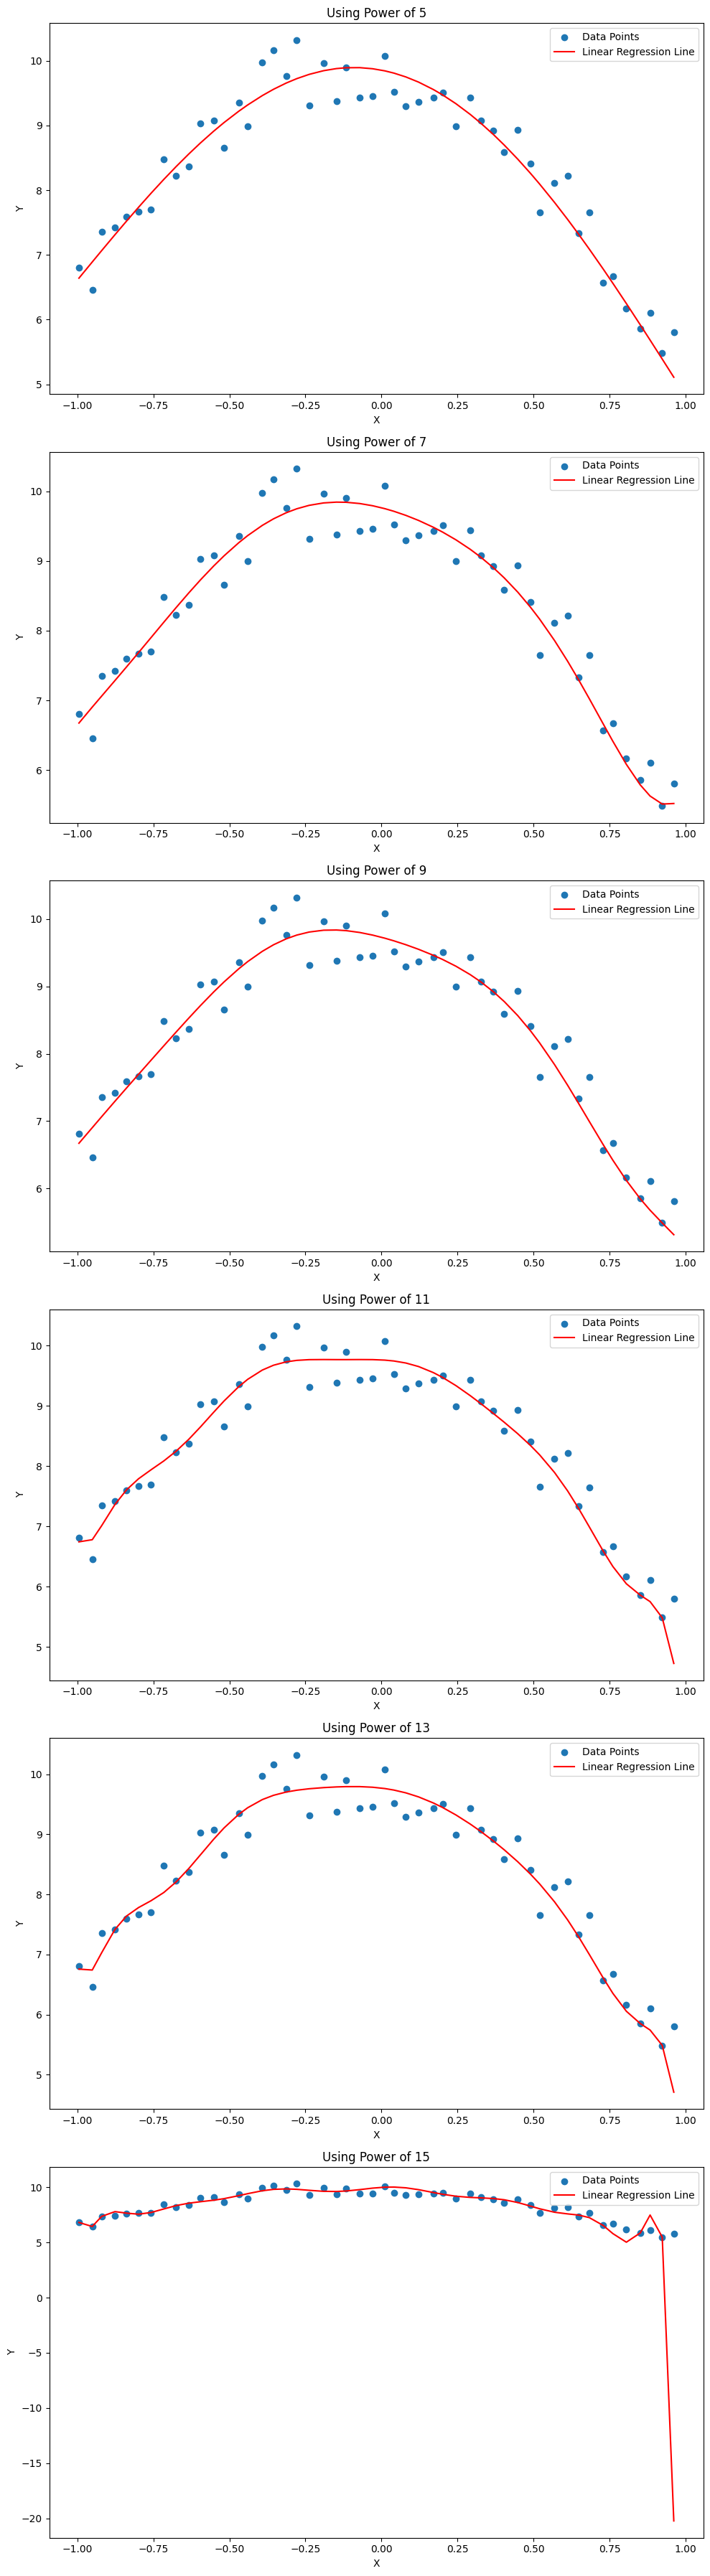

In [193]:
powers = [5,7,9,11,13,15]
fig, axes = plt.subplots(nrows=len(powers), ncols=1, figsize=(10, 6*len(powers)))

for index in range(len(powers)):
    data_train = create_power_dataset(X_train, powers[index])
    data_test = create_power_dataset(X_test, powers[index])
    optimal_weights = closed_form_linear_regression(data_train, Y_train)
    Y_predicted_train_CF = np.dot(data_train, optimal_weights)
    Y_predicted_test_CF = np.dot(data_test, optimal_weights)
    print(f'With power of {powers[index]} CF_MSE on train is {MSE(Y_predicted_train_CF, Y_train)} while CF_MSE on test is {MSE(Y_predicted_test_CF, Y_test)}.')
    
    data = create_power_dataset(X, powers[index])
    Y_predicted = np.dot(data, optimal_weights)
    axes[index].scatter(X, Y, label='Data Points')
    axes[index].set_title(f'Using Power of {powers[index]}')
    axes[index].plot(X, Y_predicted, color='red', label='Linear Regression Line')
    axes[index].set_xlabel('X')
    axes[index].set_ylabel('Y')
    axes[index].legend()

plt.tight_layout() 
plt.show()


As you can see in the model, which is using a power of 5, we have the best test error because the model is in the best shape and learns the pattern, not the data. For example, in the model, which is using a power of 15, we can see that this is overfitted to the data. model using a power of 5 is the best model, and as models become more complex, our train error becomes lower and our test error becomes bigger because it is moving to overfitting.

## E

In [194]:
def closed_form_ridge_regression(data, target, landa_prime):
    return np.dot(np.dot(np.linalg.inv(np.dot(data.T, data)+landa_prime*np.identity(data.shape[1])), data.T),target)

With power of 13 CF_MSE on train is 0.09008974709395251 while CF_MSE on test is 0.07853317815092903.
With power of 15 CF_MSE on train is 0.09006790577302565 while CF_MSE on test is 0.0801855219439115.


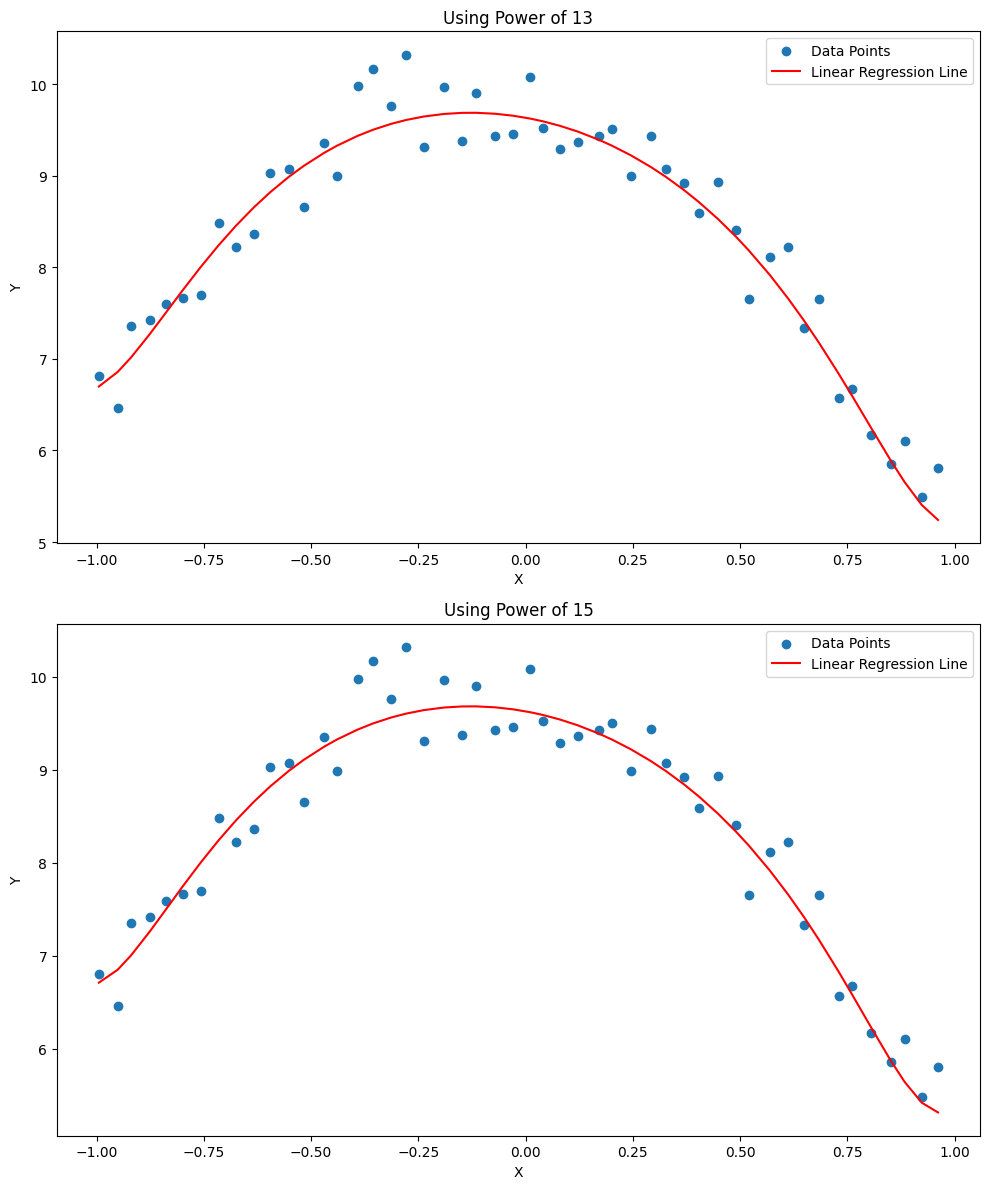

In [195]:
powers = [13,15]
landa = 0.001
fig, axes = plt.subplots(nrows=len(powers), ncols=1, figsize=(10, 6*len(powers)))

for index in range(len(powers)):
    data_train = create_power_dataset(X_train, powers[index])
    data_test = create_power_dataset(X_test, powers[index])
    optimal_weights = closed_form_ridge_regression(data_train, Y_train, landa_prime=2*len(data_train)*landa)
    Y_predicted_train_CF = np.dot(data_train, optimal_weights)
    Y_predicted_test_CF = np.dot(data_test, optimal_weights)
    print(f'With power of {powers[index]} CF_MSE on train is {MSE(Y_predicted_train_CF, Y_train)} while CF_MSE on test is {MSE(Y_predicted_test_CF, Y_test)}.')
    
    data = create_power_dataset(X, powers[index])
    Y_predicted = np.dot(data, optimal_weights)
    axes[index].scatter(X, Y, label='Data Points')
    axes[index].set_title(f'Using Power of {powers[index]}')
    axes[index].plot(X, Y_predicted, color='red', label='Linear Regression Line')
    axes[index].set_xlabel('X')
    axes[index].set_ylabel('Y')
    axes[index].legend()

plt.tight_layout() 
plt.show()


As you can see, using ridge regression, we get better test errors with powers of 13 and 15 than with a power of 5 without regularization. So it shows the power of regularization, which not only decreases test error on powers of 13 and 15, but even becomes a better model than a power of 5.

## F

In [196]:
powers = [13,15]
landa = 0.001
alpha = 0.001


for index in range(len(powers)):

    data_train = create_power_dataset(X_train, powers[index])
    data_test = create_power_dataset(X_test, powers[index])

    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(data_train[:, 1:], Y_train)
    lasso_weights = lasso_model.coef_
    lasso_bias = lasso_model.intercept_

    ridge_weights = closed_form_ridge_regression(data_train, Y_train, landa_prime=2*len(data_train)*landa)

    CF_weights = closed_form_linear_regression(data_train, Y_train)
    Y_predicted_train_CF = np.dot(data_train, CF_weights)
    Y_predicted_test_CF = np.dot(data_test, CF_weights)
    Y_predicted_train_ridge = np.dot(data_train, ridge_weights)
    Y_predicted_test_ridge = np.dot(data_test, ridge_weights)
    Y_predicted_train_lasso = np.dot(data_train[:, 1:], lasso_weights) + lasso_bias
    Y_predicted_test_lasso = np.dot(data_test[:, 1:], lasso_weights) + lasso_bias

    Y_predicted_train_lasso = lasso_model.predict(data_train[:,1:])


    print(f'\nWith power of {powers[index]}:\n')
    print(f'For Closed-Form MSE on train is {MSE(Y_predicted_train_CF, Y_train)} while on test is {MSE(Y_predicted_test_CF, Y_test)}.\n')
    print(f'bias = {CF_weights[0]} weights = {CF_weights[1:].reshape((-1))}.\n')
    print(f'For Ridge regression MSE on train is {MSE(Y_predicted_train_ridge, Y_train)} while on test is {MSE(Y_predicted_test_ridge, Y_test)}.\n')
    print(f'bias = {ridge_weights[0]} weights = {ridge_weights[1:].reshape((-1))}.\n')
    print(f'For Lasso regression MSE on train is {MSE(Y_predicted_train_lasso, Y_train)} while on test is {MSE(Y_predicted_test_lasso, Y_test)}.\n')
    print(f'bias = {lasso_bias} weights = {lasso_weights.reshape((-1))}.\n')




With power of 13:

For Closed-Form MSE on train is 0.0767243476454825 while on test is 0.10665450840440949.

bias = [9.77039037] weights = [  -0.61356124   -4.25007035   -5.86928567   10.24180846   23.21672708
  -65.13623255   13.35616121  126.87854373 -189.03383671  -91.0168779
  290.89829382   18.17823281 -134.12904037].

For Ridge regression MSE on train is 0.09008974709395251 while on test is 0.07853317815092903.

bias = [9.63236082] weights = [-0.84219437 -3.26396967 -0.11057009 -1.44708786 -0.06376916 -0.24753
  0.00623267  0.2716043   0.06970452  0.46721557  0.09974619  0.52868766
  0.09577423].

For Lasso regression MSE on train is 2.978067651879575 while on test is 3.22745874896431.

bias = [9.8097703] weights = [-0.8921597  -4.48983749  0.         -0.          0.          0.
  0.          0.          0.          0.48258673  0.01448584  0.
  0.        ].


With power of 15:

For Closed-Form MSE on train is 0.05799230507577298 while on test is 0.3425447229551698.

bias = [9.99

As you can see above, lasso regression performs poorly on train and test errors. I think because lasso is so sensitive to the scale of features, all features should be normalized to perform well, but in our example, our feature scales are different from each other. Also, as you can see, Lasso changed many of the little coefficients to zero because of abstraction, but in Ridge we have squares that really make small numbers small that do not have any impact on regularization, so they will not be set to zero. Closed-form solution use big weights because it is overfitted and do not have any penalty when using big weights, but in lasso and ridge regression we have penalties, so weights remain small. Closed form has the least error on train because it sticks to train data, while in terms of test error, the best model is ridge regression.